# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
 
#Partial query url
query_url = f'{url}appid={weather_api_key}&units={units}&q='

#set up lists to hold response info
city_name = []
lat = []
long = []
temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []
   
city_count = 0
sets = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    
    if city_count <= 49:
        city_count = city_count + 1
    else:
        city_count = 1
        sets = sets + 1
        
    #print(f"city count {city_count} and sets {sets}")
        
#Print out city name with index
      
    try:
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing record: {city_count} of set: {sets} | {city}")
    except KeyError:
        print("No weather data found")




Processing record: 1 of set: 1 | benalla
Processing record: 2 of set: 1 | atuona
Processing record: 3 of set: 1 | jamestown
Processing record: 4 of set: 1 | wuhu
Processing record: 5 of set: 1 | bonavista
Processing record: 6 of set: 1 | sechura
Processing record: 7 of set: 1 | hithadhoo
Processing record: 8 of set: 1 | puerto ayora
Processing record: 9 of set: 1 | lebu
Processing record: 10 of set: 1 | margate
Processing record: 11 of set: 1 | airai
Processing record: 12 of set: 1 | mataura
Processing record: 13 of set: 1 | sal rei
Processing record: 14 of set: 1 | teguise
No weather data found
Processing record: 16 of set: 1 | muravlenko
Processing record: 17 of set: 1 | chernyshevskiy
Processing record: 18 of set: 1 | cidreira
Processing record: 19 of set: 1 | ushuaia
Processing record: 20 of set: 1 | nouadhibou
Processing record: 21 of set: 1 | esperance
Processing record: 22 of set: 1 | kodiak
Processing record: 23 of set: 1 | opuwo
Processing record: 24 of set: 1 | albany
Process

Processing record: 2 of set: 5 | aras
Processing record: 3 of set: 5 | talnakh
Processing record: 4 of set: 5 | inirida
Processing record: 5 of set: 5 | agirish
Processing record: 6 of set: 5 | lope de vega
Processing record: 7 of set: 5 | san quintin
Processing record: 8 of set: 5 | leningradskiy
Processing record: 9 of set: 5 | tezu
Processing record: 10 of set: 5 | abu dhabi
Processing record: 11 of set: 5 | tuktoyaktuk
Processing record: 12 of set: 5 | rudraprayag
Processing record: 13 of set: 5 | nome
Processing record: 14 of set: 5 | jalu
Processing record: 15 of set: 5 | fukue
Processing record: 16 of set: 5 | itacoatiara
Processing record: 17 of set: 5 | saldanha
No weather data found
Processing record: 19 of set: 5 | hay river
Processing record: 20 of set: 5 | chuy
Processing record: 21 of set: 5 | santa cruz de la palma
No weather data found
Processing record: 23 of set: 5 | klaksvik
Processing record: 24 of set: 5 | souillac
Processing record: 25 of set: 5 | sao filipe
Proce

Processing record: 2 of set: 9 | xining
Processing record: 3 of set: 9 | riyadh
Processing record: 4 of set: 9 | rabo de peixe
Processing record: 5 of set: 9 | constitucion
Processing record: 6 of set: 9 | talcahuano
Processing record: 7 of set: 9 | luanda
Processing record: 8 of set: 9 | astana
Processing record: 9 of set: 9 | champerico
Processing record: 10 of set: 9 | hirara
Processing record: 11 of set: 9 | asyut
Processing record: 12 of set: 9 | mandalgovi
Processing record: 13 of set: 9 | havelock
Processing record: 14 of set: 9 | mahibadhoo
Processing record: 15 of set: 9 | paamiut
Processing record: 16 of set: 9 | nang rong
Processing record: 17 of set: 9 | plettenberg bay
Processing record: 18 of set: 9 | jiuquan
Processing record: 19 of set: 9 | bandarbeyla
Processing record: 20 of set: 9 | huanren
Processing record: 21 of set: 9 | dukat
Processing record: 22 of set: 9 | vostok
No weather data found
Processing record: 24 of set: 9 | sept-iles
No weather data found
Processing

Processing record: 47 of set: 12 | husavik
Processing record: 48 of set: 12 | umm lajj
Processing record: 49 of set: 12 | muros
Processing record: 50 of set: 12 | at-bashi
Processing record: 1 of set: 13 | manaus
Processing record: 2 of set: 13 | natitingou
Processing record: 3 of set: 13 | batesville


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create DataFrame
city_weather = pd.DataFrame({
    "city":  city_name,
    "latitude":  lat,
    "longitude": long,
    "max temp (F)": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "windspeed": windspeed,
    "country": country,
    "date": date
})

city_weather

,city,latitude,longitude,max temp (F),humidity,cloudiness,windspeed,country,date
0,Benalla,-36.55,145.98,48.99,70,40,11.41,AU,1596503427
1,Atuona,-9.80,-139.03,79.36,72,0,13.44,PF,1596503427
2,Jamestown,42.10,-79.24,66.00,93,90,1.54,US,1596503427
3,Wuhu,31.34,118.38,84.20,79,75,8.95,CN,1596503427
4,Bonavista,48.65,-53.11,68.00,72,43,15.01,CA,1596503313
...,...,...,...,...,...,...,...,...,...
541,Muros,42.78,-9.06,66.00,84,30,7.18,ES,1596503560
542,At-Bashi,41.17,75.81,56.08,50,0,0.47,KG,1596503560
543,Manaus,-3.10,-60.02,82.40,69,19,3.36,BR,1596503560
544,Natitingou,10.30,1.38,73.40,94,40,6.93,BJ,1596503560


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
high_humidity = city_weather.loc[city_weather["humidity"] > 100]
high_humidity

,city,latitude,longitude,max temp (F),humidity,cloudiness,windspeed,country,date


In [6]:
#  Get the indices of cities that have humidity over 100%.

#none

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#n/a

In [8]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
# Note to avoid any issues later, use encoding="utf-8"
output_data_file = city_weather.to_csv("output_data/cities.csv", encoding="utf-8", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

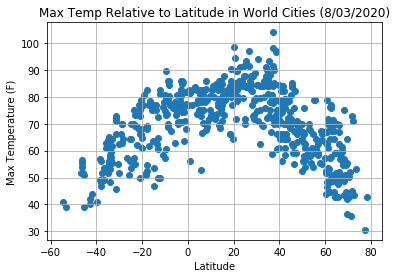

In [29]:
#Latitude vs Tempurature Plot
x_values = city_weather["latitude"]
y_values = city_weather["max temp (F)"]
plt.scatter(x_values, y_values, marker="o")

# Incorporate the other graph properties
plt.title("Max Temp Relative to Latitude in World Cities (8/03/2020)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/TemperaturevsLatitude.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

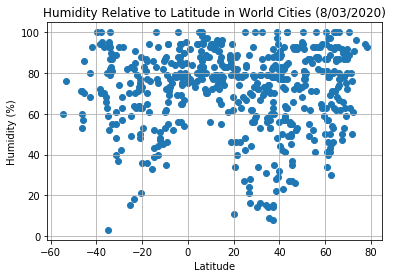

In [30]:
#Latitude vs Humidity Plot
x_values = city_weather["latitude"]
y_values = city_weather["humidity"]
plt.scatter(x_values, y_values, marker="o")

# Incorporate the other graph properties
plt.title("Humidity Relative to Latitude in World Cities (8/03/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/HumidityvsLatitude.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

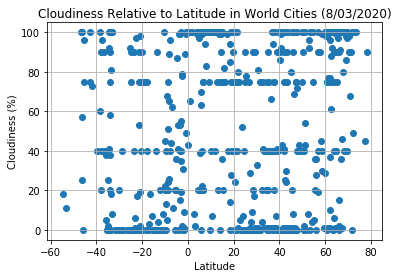

In [31]:
#Latitude vs Cloudiness Plot
x_values = city_weather["latitude"]
y_values = city_weather["cloudiness"]
plt.scatter(x_values, y_values, marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness Relative to Latitude in World Cities (8/03/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CloudinessvsLatitude.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

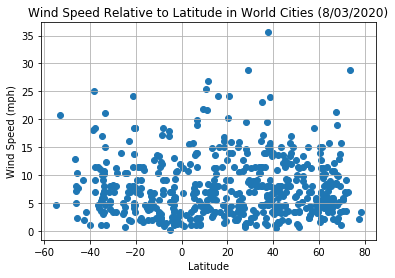

In [32]:
#Latitude vs Wind Speed Plot
x_values = city_weather["latitude"]
y_values = city_weather["windspeed"]
plt.scatter(x_values, y_values, marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed Relative to Latitude in World Cities (8/03/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WindspeedvsLatitude.png")

# Show plot
plt.show()

## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern = city_weather[city_weather["latitude"] >= 0]
northern

,city,latitude,longitude,max temp (F),humidity,cloudiness,windspeed,country,date
2,Jamestown,42.10,-79.24,66.00,93,90,1.54,US,1596503427
3,Wuhu,31.34,118.38,84.20,79,75,8.95,CN,1596503427
4,Bonavista,48.65,-53.11,68.00,72,43,15.01,CA,1596503313
9,Margate,51.38,1.39,61.00,79,54,3.58,GB,1596503231
12,Sal Rei,16.18,-22.92,78.80,83,75,14.99,CV,1596503429
...,...,...,...,...,...,...,...,...,...
540,Umluj,25.02,37.27,84.18,48,0,5.37,SA,1596503559
541,Muros,42.78,-9.06,66.00,84,30,7.18,ES,1596503560
542,At-Bashi,41.17,75.81,56.08,50,0,0.47,KG,1596503560
544,Natitingou,10.30,1.38,73.40,94,40,6.93,BJ,1596503560


In [14]:
southern = city_weather[city_weather["latitude"] <= 0]
southern

,city,latitude,longitude,max temp (F),humidity,cloudiness,windspeed,country,date
0,Benalla,-36.55,145.98,48.99,70,40,11.41,AU,1596503427
1,Atuona,-9.80,-139.03,79.36,72,0,13.44,PF,1596503427
5,Sechura,-5.56,-80.82,62.73,79,0,16.93,PE,1596503428
6,Hithadhoo,-0.60,73.08,81.73,79,100,11.92,MV,1596503428
7,Puerto Ayora,-0.74,-90.35,68.00,95,99,3.00,EC,1596503428
...,...,...,...,...,...,...,...,...,...
525,São Miguel do Araguaia,-13.28,-50.16,72.59,40,4,6.29,BR,1596503556
528,Menongue,-14.66,17.69,46.94,52,0,3.67,AO,1596503557
532,Comarapa,-17.90,-64.48,52.27,86,0,1.95,BO,1596503558
536,Bundaberg,-24.85,152.35,69.80,49,75,0.76,AU,1596503559


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.44362540480648904


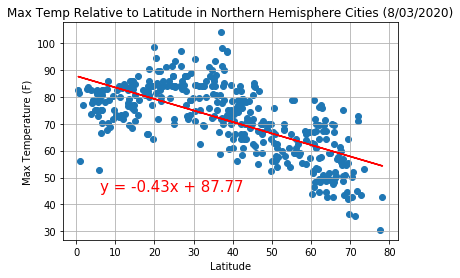

<Figure size 432x288 with 0 Axes>

In [33]:
# Print out the r-squared value along with the plot.
x_values = northern["latitude"]
y_values = northern["max temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,45),fontsize=15,color="red")
plt.title("Max Temp Relative to Latitude in Northern Hemisphere Cities (8/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Save the figure
plt.savefig("output_data/NorthTemperaturevsLatitude.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5445918481085209


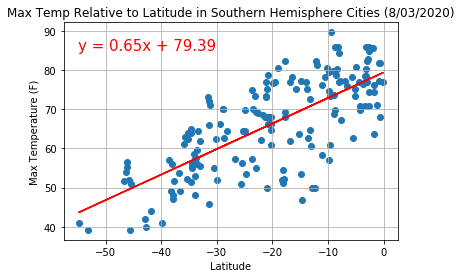

<Figure size 432x288 with 0 Axes>

In [34]:
# Print out the r-squared value along with the plot.
x_values = southern["latitude"]
y_values = southern["max temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
plt.title("Max Temp Relative to Latitude in Southern Hemisphere Cities (8/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Save the figure
plt.savefig("output_data/SouthTemperaturevsLatitude.png")

In [17]:
#These scatter plots and r-values indicate that the maximum temperature tends to increas the closer a city is to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006936138821639972


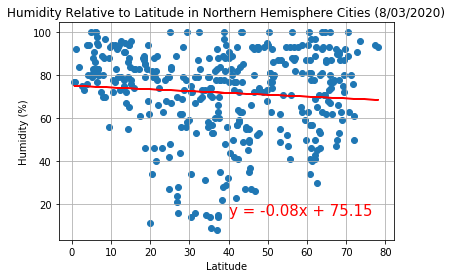

<Figure size 432x288 with 0 Axes>

In [35]:
# Print out the r-squared value along with the plot.
x_values = northern["latitude"]
y_values = northern["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.title("Humidity Relative to Latitude in Northern Hemisphere Cities (8/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Save the figure
plt.savefig("output_data/NorthHumidityvsLatitude.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0005511534096336091


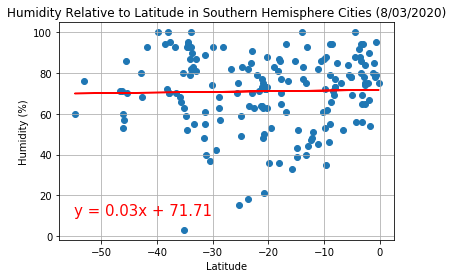

<Figure size 432x288 with 0 Axes>

In [36]:
# Print out the r-squared value along with the plot.
x_values = southern["latitude"]
y_values = southern["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.title("Humidity Relative to Latitude in Southern Hemisphere Cities (8/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Save the figure
plt.savefig("output_data/SouthHumidityvsLatitude.png")

In [21]:
#These scatter plots and r-values indicate that the latitude of a city does not have a major affect on the humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.000315184224179909


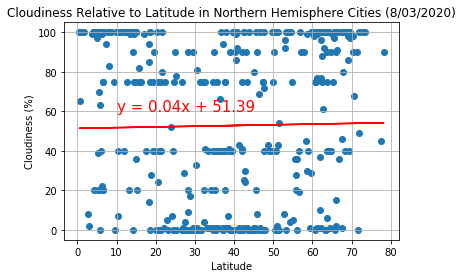

<Figure size 432x288 with 0 Axes>

In [37]:
# Print out the r-squared value along with the plot.
x_values = northern["latitude"]
y_values = northern["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,60),fontsize=15,color="red")
plt.title("Cloudiness Relative to Latitude in Northern Hemisphere Cities (8/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Save the figure
plt.savefig("output_data/NorthCloudinessvsLatitude.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.001719127708544532


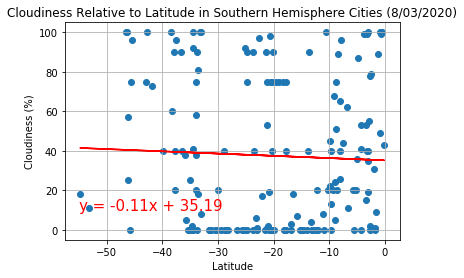

<Figure size 432x288 with 0 Axes>

In [38]:
# Print out the r-squared value along with the plot.
x_values = southern["latitude"]
y_values = southern["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.title("Cloudiness Relative to Latitude in Southern Hemisphere Cities (8/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Save the figure
plt.savefig("output_data/SouthCloudinessvsLatitude.png")

In [25]:
#These scatter plots indicate that there is minimal relationship between latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0032944555379906247


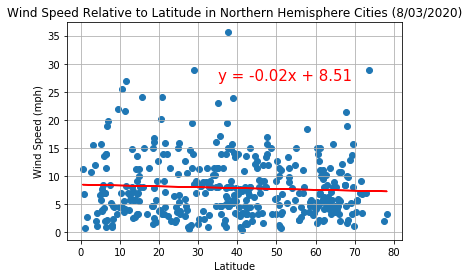

<Figure size 432x288 with 0 Axes>

In [39]:
# Print out the r-squared value along with the plot.
x_values = northern["latitude"]
y_values = northern["windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,27),fontsize=15,color="red")
plt.title("Wind Speed Relative to Latitude in Northern Hemisphere Cities (8/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Save the figure
plt.savefig("output_data/NorthWindspeedvsLatitude.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.038368132214323565


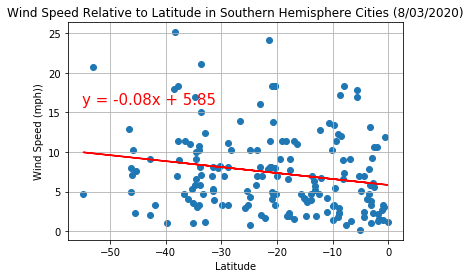

<Figure size 432x288 with 0 Axes>

In [40]:
# Print out the r-squared value along with the plot.
x_values = southern["latitude"]
y_values = southern["windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,16),fontsize=15,color="red")
plt.title("Wind Speed Relative to Latitude in Southern Hemisphere Cities (8/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Save the figure
plt.savefig("output_data/SouthWindspeedvsLatitude.png")

In [28]:
#These scatter plots and r-values indicate that there is minimal relationship between latitude and wind speed.